In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Hiragino Sans"
main_color = "#FFAA7A"

In [2]:
movies = pd.read_csv("../data/ml-1m/movies.csv")
movies

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1990
4,5,Father of the Bride Part II (1995),Comedy,1990
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [3]:
fig = plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

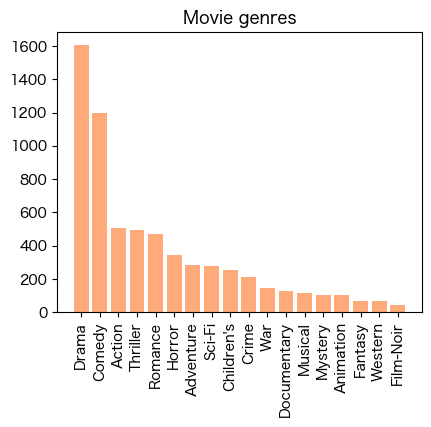

In [4]:
genre_count = {}
for genres in movies.genre.apply(lambda s: s.split("|")):
    for genre in genres:
        if genre not in genre_count:
            genre_count[genre] = 0
        genre_count[genre] += 1

genre_count = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
keys = list(map(lambda x: x[0], genre_count))
values = list(map(lambda x: x[1], genre_count))

ax = fig.add_subplot(2, 3, 1)
ax.set_title("Movie genres")
ax.bar(keys, values, color=main_color)
ax.tick_params('x', labelrotation=90)
fig

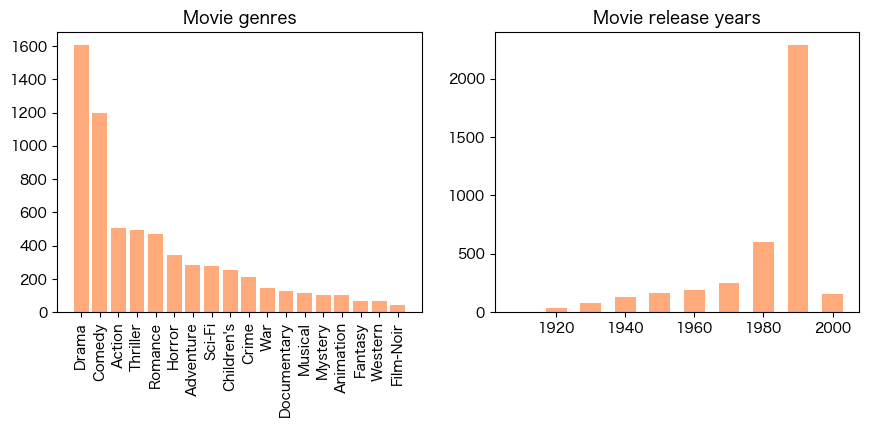

In [5]:
year_count = movies.year.value_counts()

ax = fig.add_subplot(2, 3, 2)
ax.set_title("Movie release years")
ax.bar(year_count.keys(), year_count, width=6.0, color=main_color)
fig

In [6]:
ratings = pd.read_csv("../data/ml-1m/ratings.dat", sep="::", engine="python", header=None)
ratings.columns = ["user_id", "movie_id", "rate", "timestamp"]
ratings

,user_id,movie_id,rate,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


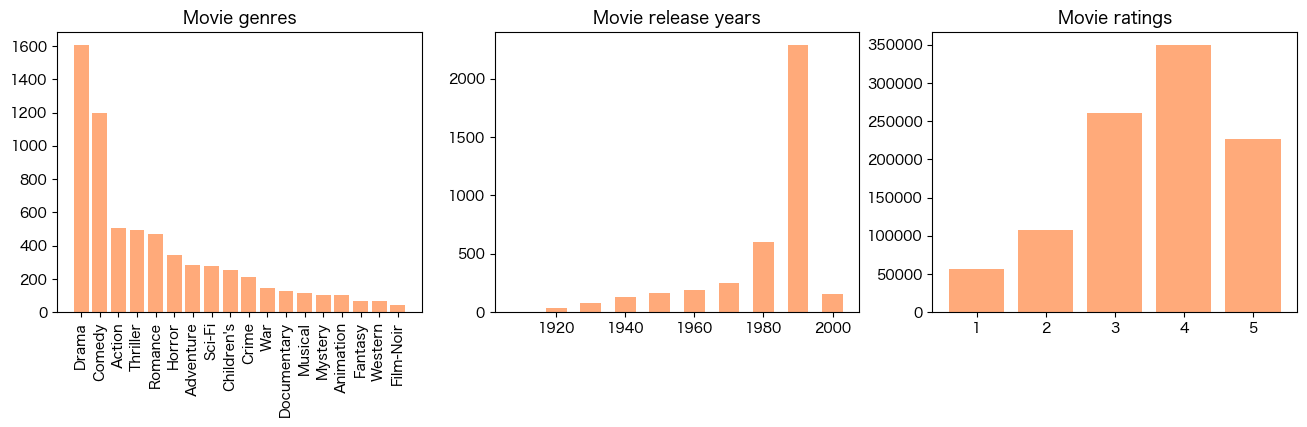

In [7]:
rate_count = ratings.rate.value_counts()
ax = fig.add_subplot(2, 3, 3)
ax.set_title("Movie ratings")
ax.bar(rate_count.keys(), rate_count, color=main_color)
fig

In [8]:
users = pd.read_csv("../data/ml-1m/users.csv")
users

,user_id,gender,age,occupation
0,1,F,Under 18,K-12 student
1,2,M,56+,self-employed
2,3,M,25-34,scientist
3,4,M,45-49,executive/managerial
4,5,M,25-34,writer
...,...,...,...,...
6035,6036,F,25-34,scientist
6036,6037,F,45-49,academic/educator
6037,6038,F,56+,academic/educator
6038,6039,F,45-49,other


In [9]:
age_count = users.age.value_counts()
keys = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-49",
    "50-55",
    "56+",
]
ax = fig.add_subplot(2, 3, 4)
ax.set_title("User age groups")
ax.bar(keys, list(map(lambda x: age_count[x], keys)), color=main_color)
fig.tight_layout()

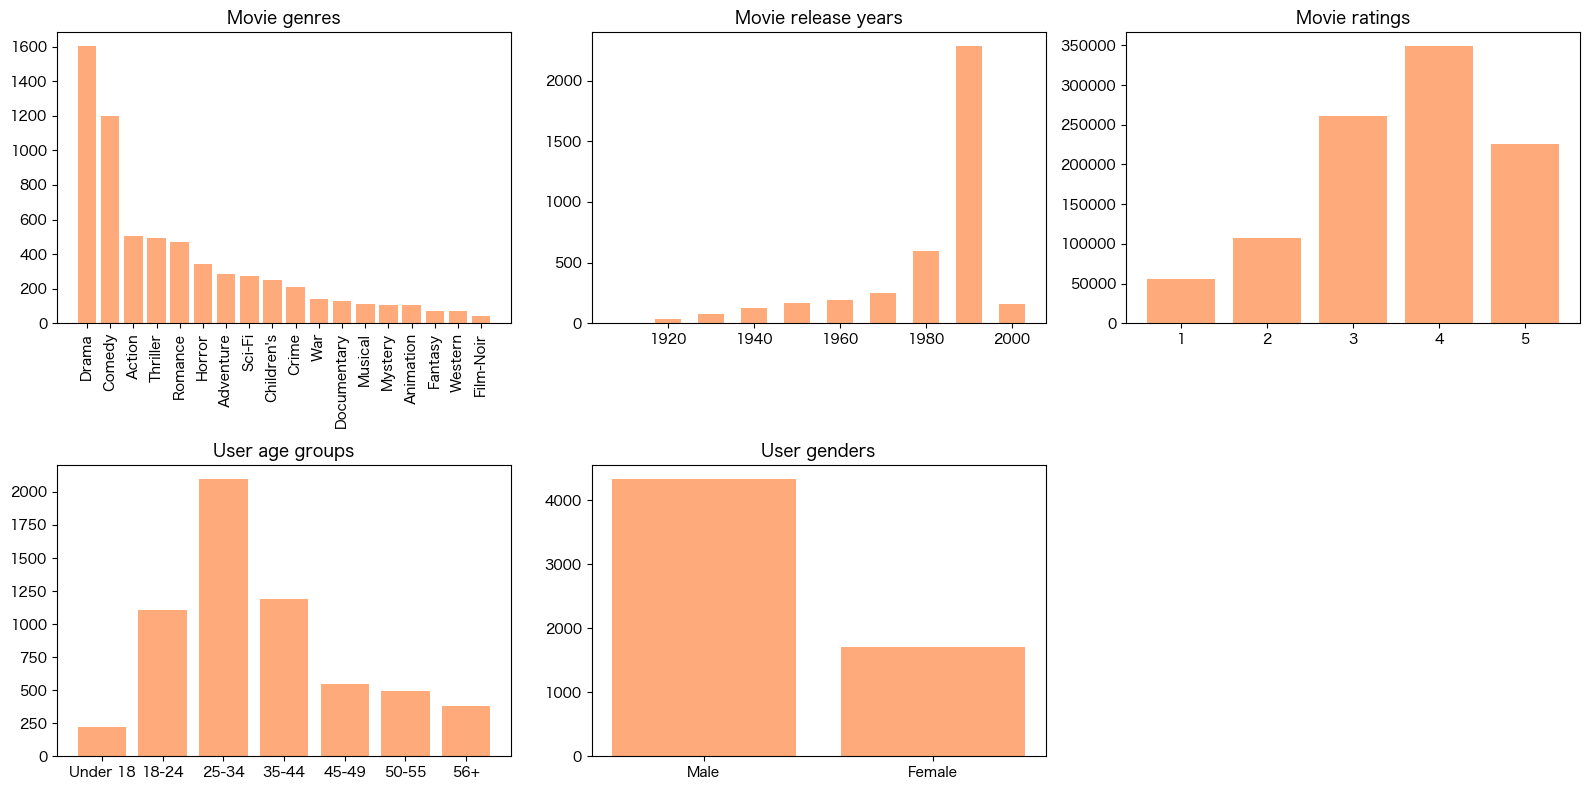

In [10]:
gender_count = users.gender.value_counts()
ax = fig.add_subplot(2, 3, 5)
ax.set_title("User genders")
ax.bar(["Male", "Female"], gender_count, color=main_color)
fig

In [11]:
occupation_count = users.occupation.value_counts()

ax = fig.add_subplot(2, 3, 6)
ax.tick_params('x', labelrotation=90)
ax.set_title("User occupations")
ax.bar(occupation_count.keys(), occupation_count, color=main_color)

<BarContainer object of 21 artists>

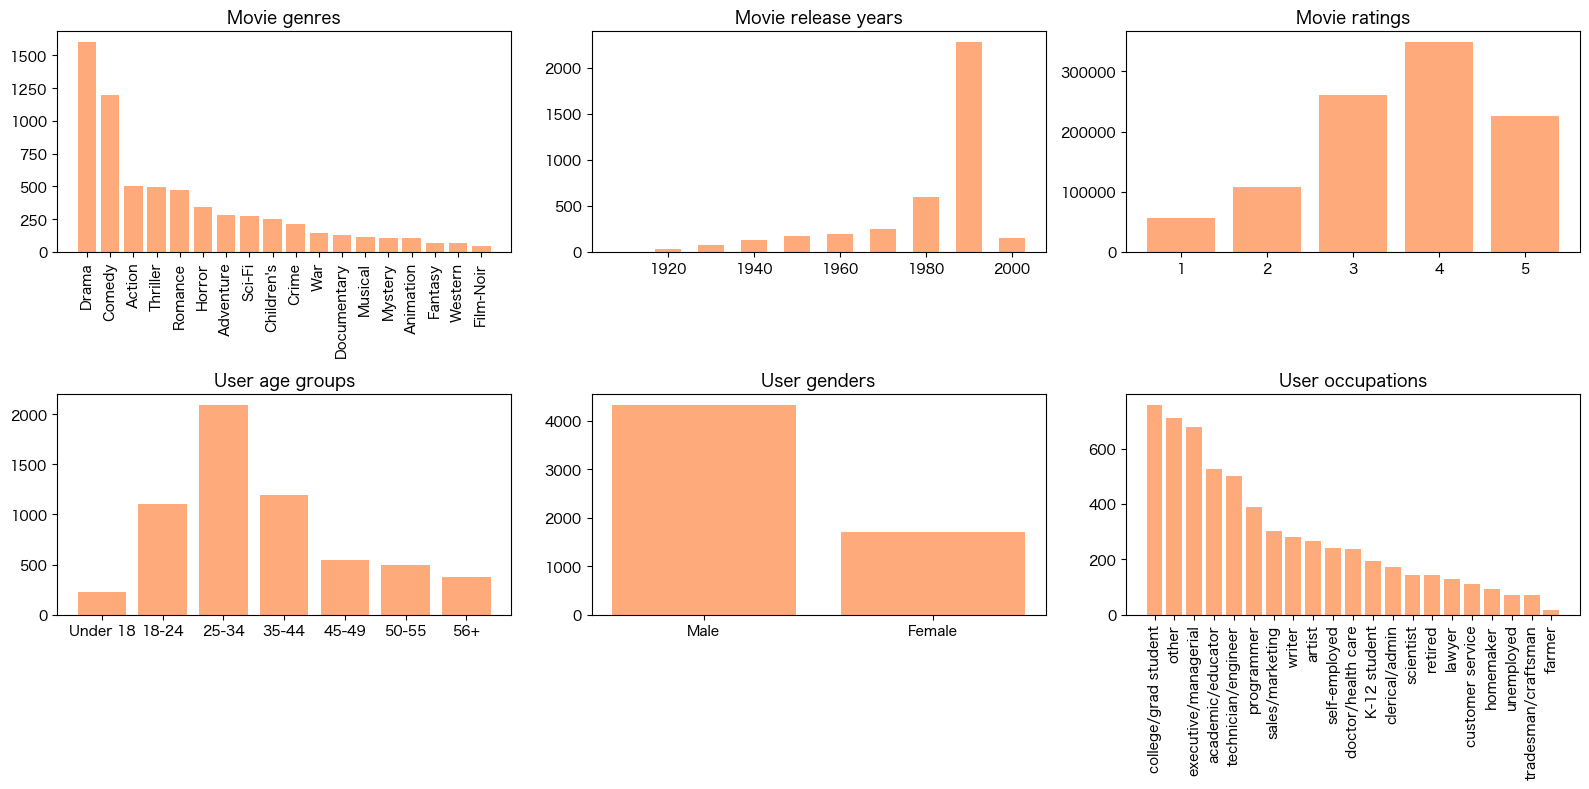

In [15]:
fig.tight_layout()
fig